## Lab | Data cleaning and wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#get file and convert it to data frame
data=pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Data Cleaning

#### Standarize column headers

In [3]:
#change columns names to lower case
data.columns=data.columns.str.lower()
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [4]:
#and replace spaces with _
data.columns=data.columns.str.replace(' ','_')
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### Check the data types of the columns

In [5]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [6]:
#get the numerical data into dataframe called numerical
numerical=data.select_dtypes(np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [7]:
#get the numerical data into dataframe called numerical
categorical=data.select_dtypes(np.object)
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


#### Check for nulls

In [8]:
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
data.isna().sum()*100/len(data)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [10]:
data.shape

(9134, 24)

#### Check for duplicates

In [11]:
data_c = data.drop_duplicates()
data_c.shape

(9134, 24)

### Data wrangling

In [12]:
data_w=data_c

#### Check the normality of the numerical variables visually

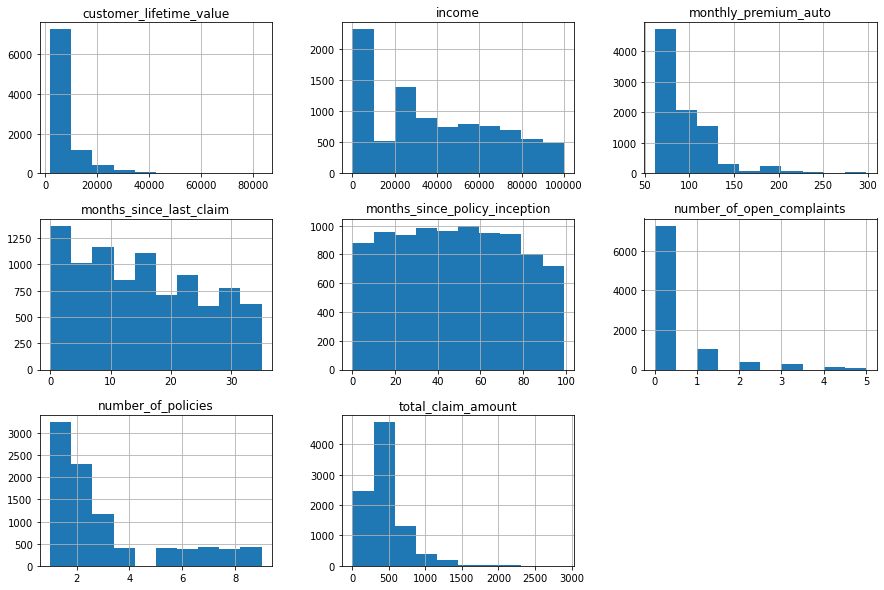

In [13]:
numerical.hist(figsize = (15,10));

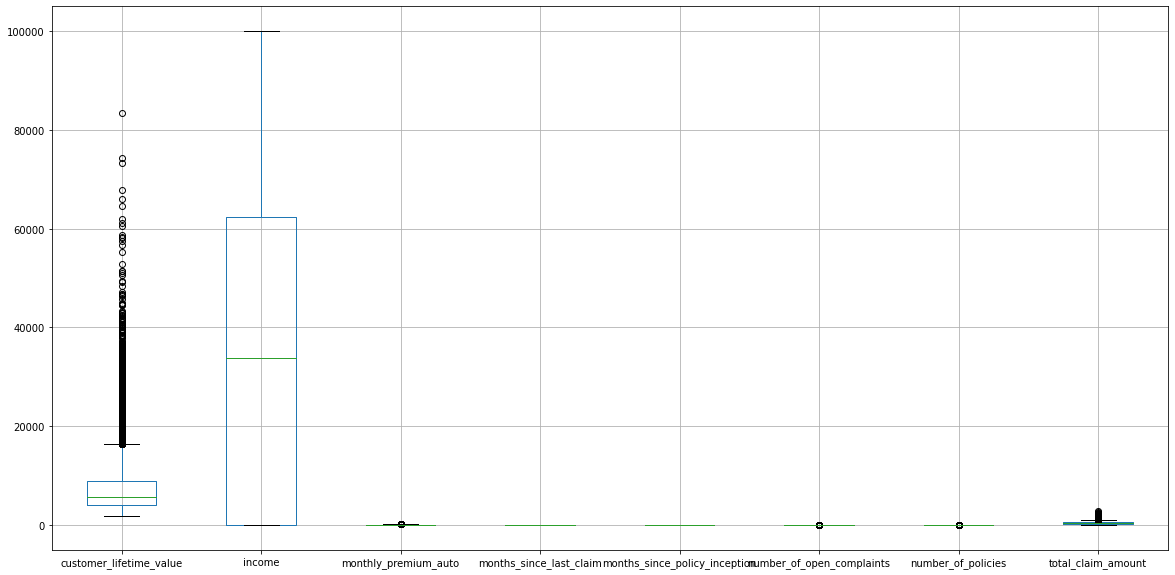

In [14]:
data_w.boxplot(figsize=(20,10));

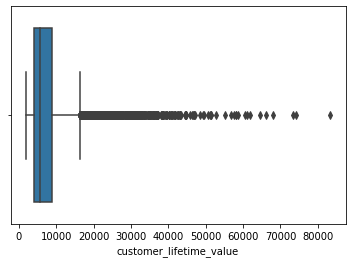

In [15]:
sns.boxplot(x=data_w['customer_lifetime_value']);

In [16]:
#remove outliers
def remove_outliers(data_w):
    Q1=np.percentile(data_w, 25)
    Q3=np.percentile(data_w,75)
    IQR=Q3-Q1
    data_w = data_w[~((data_w<(Q1-1.5*IQR)) | (data_w>(Q3+1.5*IQR)))]
    return data_w

In [17]:
data_w['customer_lifetime_value'] = remove_outliers(data['customer_lifetime_value'])

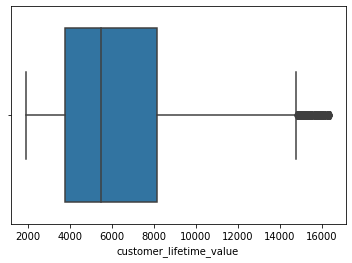

In [18]:
sns.boxplot(x=data_w['customer_lifetime_value']);

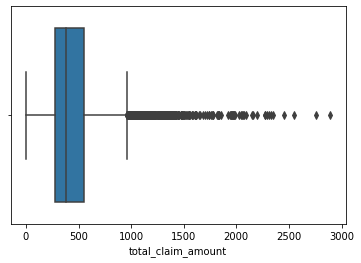

In [19]:
sns.boxplot(x=data_w['total_claim_amount']);

In [20]:
data_w['total_claim_amount'] = remove_outliers(data['total_claim_amount'])

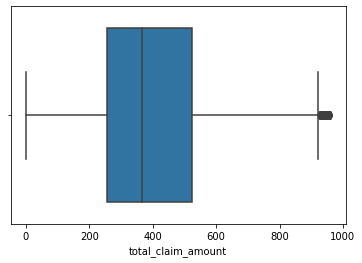

In [21]:
sns.boxplot(x=data_w['total_claim_amount']);

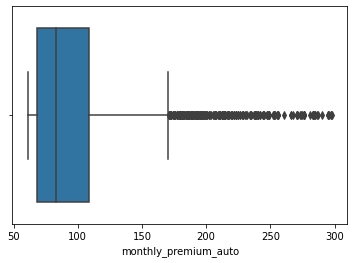

In [22]:
sns.boxplot(x=data_w['monthly_premium_auto']);

In [23]:
data_w['monthly_premium_auto']=remove_outliers(data_w['monthly_premium_auto'])

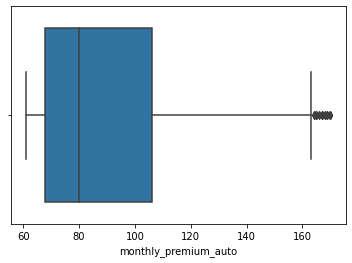

In [24]:
sns.boxplot(x=data_w['monthly_premium_auto']);

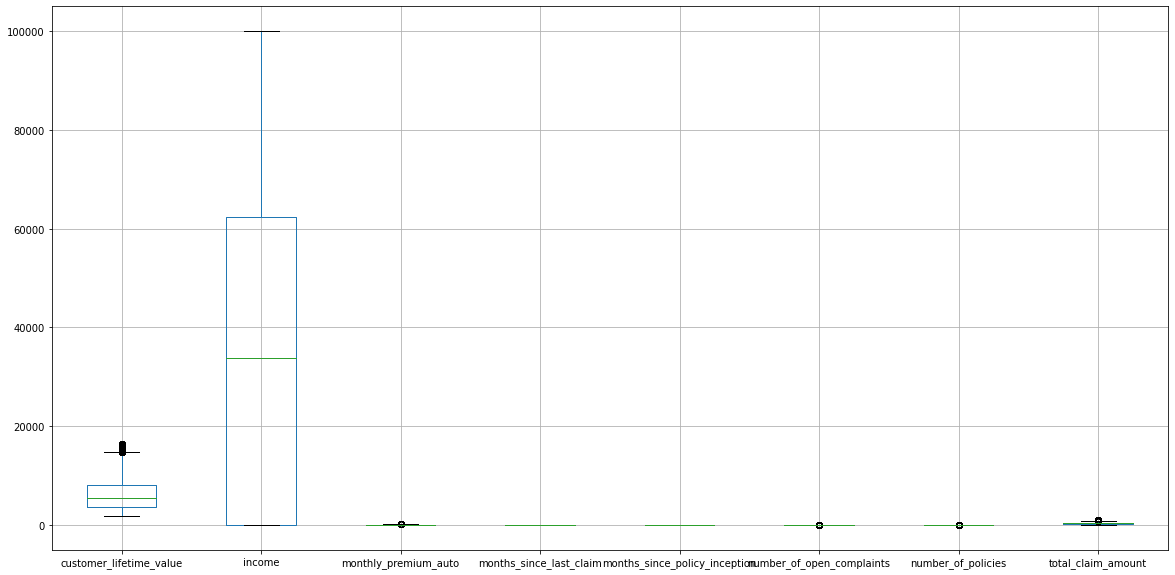

In [25]:
data_w.boxplot(figsize=(20,10));

In [26]:
data_w.isna().sum()

customer                           0
state                              0
customer_lifetime_value          817
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto             430
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount               453
vehicle_class                      0
vehicle_size                       0
dtype: int64

#### Normalize the continuous variables.

In [27]:
#Normalization
from sklearn.preprocessing import Normalizer

X = data_w._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69.0,32,5,0,1,384.811147
1,6979.535903,0,94.0,13,42,0,8,NaN
2,12887.431650,48767,108.0,18,38,0,2,566.472247
3,7645.861827,0,106.0,18,65,0,7,529.881344
4,2813.692575,43836,73.0,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,NaN,71941,73.0,18,89,0,2,198.234764
9130,3096.511217,21604,79.0,14,28,0,1,379.200000
9131,8163.890428,0,85.0,9,37,3,2,790.784983
9132,7524.442436,21941,96.0,34,3,0,3,691.200000


In [32]:
X.isna().sum()*100/len(X)

customer_lifetime_value          8.944603
income                           0.000000
monthly_premium_auto             4.707686
months_since_last_claim          0.000000
months_since_policy_inception    0.000000
number_of_open_complaints        0.000000
number_of_policies               0.000000
total_claim_amount               4.959492
dtype: float64

In [34]:
#let's drop the missing values 
X = X.dropna()

In [35]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized, columns=X.columns)

In [36]:
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
2,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
3,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
4,0.130140,0.991491,0.001088,0.000221,0.001482,0.000000,0.000032,0.002512
...,...,...,...,...,...,...,...,...
7842,0.085532,0.996268,0.002169,0.000334,0.001210,0.000000,0.000021,0.011291
7843,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
7844,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
7845,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786


#### Encode the categorical variables

In [56]:
categorical = data_w.select_dtypes(np.object)
categorical.columns

Index(['customer', 'state', 'effective_to_date', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [57]:
categorical=pd.get_dummies(categorical, columns = ['customer', 'state', 'effective_to_date', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'], drop_first=False)
categorical.head()

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [58]:
categorical.dtypes

customer_AA10041              uint8
customer_AA11235              uint8
customer_AA16582              uint8
customer_AA30683              uint8
customer_AA34092              uint8
                              ...  
vehicle_class_Sports Car      uint8
vehicle_class_Two-Door Car    uint8
vehicle_size_Large            uint8
vehicle_size_Medsize          uint8
vehicle_size_Small            uint8
Length: 9235, dtype: object

#### Transform the time variables (day, week and month) to integers.

#### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.